# Análise exploratória

Iniciando a análise exploratória com a leitura do DataFrame formado pelos principais indices econômicos e valores de comercio internacional com algumas principais categorias

In [41]:
#importing libraries
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import seaborn as sns
from sklearn import linear_model

pyplot.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv('DataFrameMain.csv', sep= ';')
pd.set_option('display.max_columns', None)
df[:10]

,Date,iBov,IBC-Br,PIB-Acum(MR$),PIB-Acum(MU$),Empr- Carteira,DivPub(R$),DivPub(% PIB),DivPub(U$),IPCA(%),Exports(US$),Imports(US$),Exports (Kg),Imports (Kg),Exp- Cotton(US$),Exp- Aluminum(US$),Exp-Iron(US$),Exp-Soy(US$),Exp-Passenger motor vehicles(US$),Exp- Airplanes(US$),Exp-Hydrocarbons(US$),Exp-Motor vehicles for the transport of goods(US$),Exp-Crude Oil(US$),Exp-Orange juice(US$),PIB-mes(MR$),PIB-mes(MU$),Imp-Capital Goods(U$),"Imp-Primary food and beverages, mainly for industry(US$)",Imp-Primary industrial supplies(U$),Imp-Parts and accessories for capital goods(US$),Imp-Consumption goods(US$),Imp-Passenger motor vehicles(US$),"Imp-Primary food and beverages, mainly for household consumption(US$)",Imp-Fuels and lubs(US$)
0,jan/04,101812.1,98.59,144558.6,49802,107.05,917346.23,52.86,312011.91,0.76,5786904166,4207686908,32693675263,8109005076,16599701,16301956,439895545,99169681,195466018,150059109,21173604,49372462,229737858,15659284,144558.6,49802,432475957,80043004,111238900,610585790,341810085,40368251,25679527,666284765
1,fev/04,100967.2,99.45,287419.9,100147,107.81,910484.19,52.12,312558.94,0.61,5715580929,3748677231,24753835286,6759163397,12100141,9960801,282396619,127324531,188698396,176338124,18999500,64213754,200683383,6522185,142861.3,50345,466143181,84418523,128622605,562955457,347762513,54576372,35517120,459220386
2,mar/04,97030.3,111.98,444783.5,156956,108.39,913609.96,51.75,314192.85,0.47,7907130664,5336953197,36912969113,8653291327,8737312,16377398,450429529,453433518,271818533,271639106,31592860,90116404,256672821,37526414,157363.5,56809,576749464,127022414,138348791,819374520,477420075,42160962,54487435,689780576
3,abr/04,96353.3,107.36,601737.4,212280,109.36,918095.92,51.55,311863.83,0.37,6581422428,4627585238,19822876417,6992934845,3488505,9669660,211224560,568559445,232870773,209936187,35381759,79555771,76173983,21122459,156953.9,55324,551587540,68294000,164011419,732186759,384876230,37067494,27834816,760500390
4,mai/04,95414.6,106.03,761236.3,267151,110.83,941268.02,52.27,300888.03,0.51,7930944020,4830229172,25705317504,7833524404,3746205,14084690,301658994,738761974,259330813,369344186,32244076,96277826,231603147,24615219,159498.9,54872,550615137,92520056,114406903,734008556,448812347,56016852,29503907,875132053
5,jun/04,95584.4,107.00,926578.4,322731,111.91,946539.21,51.77,304676.73,0.71,9306641136,5523155106,34269174036,10132944638,10180864,17489550,394248972,1045129879,305721788,374335484,28370523,86051932,295307681,8054573,165342.2,55580,544263938,111155126,137065609,809369151,466606180,58557397,31042666,975839171
6,jul/04,97393.7,111.47,1097949.3,380813,112.98,944978.98,50.98,312286.51,0.91,8962900814,5522542967,37311383481,9274375292,32165448,19066602,489420819,681140782,330490170,333878605,44969962,107397080,231719816,19542337,171370.9,58082,558319960,92472444,136382609,815166369,484082821,56209442,31653709,962863664
7,ago/04,87887.3,110.65,1267128.2,438498,114.15,945701.39,50.36,322434.84,0.69,9051481682,5617645595,38307945336,9001272608,59615813,19659776,505739417,580532355,350573056,238813797,37853551,101290107,321934004,37300525,169178.9,57685,595847802,84396781,142169199,823085410,447089339,35141191,31911086,929027333
8,set/04,89504.0,109.21,1431830.8,495613,115.24,942224.68,49.74,329702.81,0.33,8912129563,5744523506,33817106111,9680013559,63673561,13976738,413057313,647765873,314267269,298808865,41542761,104718316,70818158,26475176,164702.5,57115,582877592,94059703,140618024,818278065,502824459,53440792,34450018,877751086
9,out/04,87423.6,108.89,1602367.3,553452,115.93,949353.89,49.71,332441.74,0.44,8835878929,5841240001,30010889468,9286933313,83163770,15328525,407411003,240405595,338704685,235363739,48760443,105642077,199131186,30335488,170536.5,57839,568220075,82148030,116104573,823481320,467807073,36711372,41011966,1194449557


In [2]:
len(df)

187

Analisando as correlações entre as variáveis

In [3]:
df.corr()

,iBov,IBC-Br,PIB-Acum(MR$),PIB-Acum(MU$),Empr- Carteira,DivPub(R$),DivPub(% PIB),DivPub(U$),IPCA(%),Exports(US$),Imports(US$),Exports (Kg),Imports (Kg),Exp- Cotton(US$),Exp- Aluminum(US$),Exp-Iron(US$),Exp-Soy(US$),Exp-Passenger motor vehicles(US$),Exp- Airplanes(US$),Exp-Hydrocarbons(US$),Exp-Motor vehicles for the transport of goods(US$),Exp-Crude Oil(US$),Exp-Orange juice(US$),PIB-mes(MR$),PIB-mes(MU$),Imp-Capital Goods(U$),"Imp-Primary food and beverages, mainly for industry(US$)",Imp-Primary industrial supplies(U$),Imp-Parts and accessories for capital goods(US$),Imp-Consumption goods(US$),Imp-Passenger motor vehicles(US$),"Imp-Primary food and beverages, mainly for household consumption(US$)",Imp-Fuels and lubs(US$)
iBov,1.000000,-0.454272,-0.388184,-0.204473,-0.533442,-0.776062,-0.278083,-0.761162,0.257087,-0.491222,-0.332996,-0.608902,-0.438304,-0.278415,-0.034122,-0.184792,-0.368601,-0.297932,-0.038919,-0.029404,-0.308567,-0.543810,-0.393626,-0.678247,-0.395048,-0.306606,-0.357078,-0.304841,-0.328781,-0.352592,-0.068649,-0.487137,-0.102961
IBC-Br,-0.454272,1.000000,0.496944,0.539107,0.922619,0.446995,-0.506548,0.715365,0.003593,0.894378,0.921516,0.689761,0.849735,0.410795,0.450823,0.758545,0.513618,0.165271,0.120629,0.585722,0.376674,0.619981,0.649491,0.760289,0.929208,0.805028,0.653695,0.592617,0.904905,0.941990,0.746982,0.867346,0.688708
PIB-Acum(MR$),-0.388184,0.496944,1.000000,0.876257,0.529357,0.482421,-0.037864,0.405292,-0.147882,0.530750,0.393624,0.665650,0.541369,0.645655,0.320090,0.345735,0.139629,0.282984,0.385624,0.127449,0.362507,0.397676,0.393336,0.600044,0.403318,0.352494,0.219906,0.173625,0.303445,0.456531,0.256451,0.516450,0.204490
PIB-Acum(MU$),-0.204473,0.539107,0.876257,1.000000,0.464367,0.158322,-0.314931,0.339787,-0.125487,0.601015,0.537488,0.476827,0.519304,0.631652,0.389342,0.567646,0.010010,0.249121,0.486114,0.358252,0.358085,0.414676,0.444430,0.368512,0.541047,0.471707,0.279203,0.318610,0.435315,0.580309,0.552842,0.490451,0.429048
Empr- Carteira,-0.533442,0.922619,0.529357,0.464367,1.000000,0.619676,-0.418428,0.741538,0.077760,0.800426,0.820190,0.731809,0.803044,0.467517,0.380605,0.637803,0.495805,0.106082,0.060086,0.426193,0.300351,0.602870,0.646205,0.902006,0.864214,0.739570,0.593663,0.433362,0.783753,0.884851,0.588814,0.896220,0.537934
DivPub(R$),-0.776062,0.446995,0.482421,0.158322,0.619676,1.000000,0.445754,0.751419,-0.156281,0.476794,0.275625,0.763395,0.508286,0.364926,0.084458,0.164690,0.500050,0.310080,-0.067278,-0.108374,0.328336,0.534246,0.383329,0.880835,0.320438,0.273821,0.247313,0.133230,0.265598,0.340393,-0.057827,0.566657,-0.032163
DivPub(% PIB),-0.278083,-0.506548,-0.037864,-0.314931,-0.418428,0.445754,1.000000,0.069601,-0.282674,-0.317513,-0.570832,0.052417,-0.291547,-0.090154,-0.317576,-0.473287,0.014940,0.244096,-0.155825,-0.560530,0.051525,-0.022844,-0.269034,-0.015546,-0.575073,-0.491234,-0.374116,-0.296267,-0.539589,-0.574136,-0.675866,-0.349425,-0.602804
DivPub(U$),-0.761162,0.715365,0.405292,0.339787,0.741538,0.751419,0.069601,1.000000,-0.192314,0.770114,0.655050,0.666159,0.654954,0.370604,0.247059,0.611994,0.446256,0.349849,0.012103,0.320735,0.451691,0.731931,0.609496,0.770078,0.738778,0.574797,0.508648,0.504980,0.642203,0.694011,0.470864,0.746109,0.391623
IPCA(%),0.257087,0.003593,-0.147882,-0.125487,0.077760,-0.156281,-0.282674,-0.192314,1.000000,-0.153057,0.010862,-0.112376,-0.032876,0.020074,0.050796,-0.046628,-0.181431,-0.304769,0.043754,-0.133767,-0.315118,-0.127858,0.009597,-0.013140,0.003036,-0.000659,-0.008584,-0.004493,-0.014018,0.058292,0.057330,0.075310,0.029026
Exports(US$),-0.491222,0.894378,0.530750,0.601015,0.800426,0.476794,-0.317513,0.770114,-0.153057,1.000000,0.896700,0.737001,0.815202,0.429974,0.477247,0.838523,0.574154,0.343583,0.209063,0.575543,0.556643,0.767916,0.642593,0.688320,0.869090,0.799851,0.607383,0.674050,0.860099,0.878908,0.745328,0.761116,0.694765


A analise de correlação nos mostra algumas informações interessantes:

- Os valores de importação e exportação em dólares andam sempre juntos, tendo uma correlação de 89%




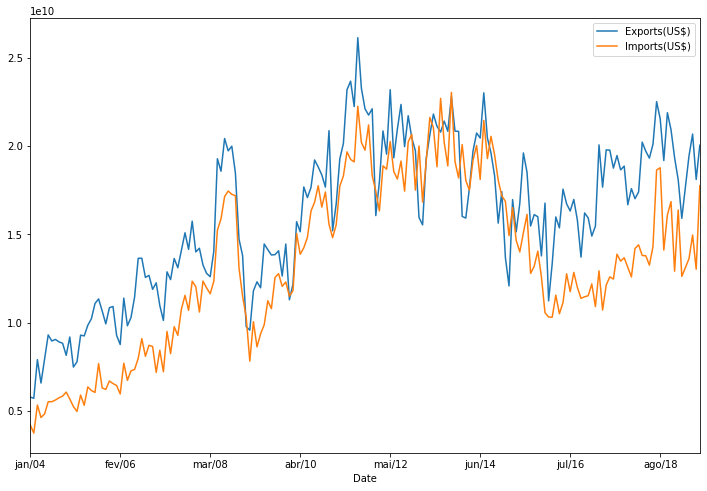

In [17]:
df.plot.line(x='Date', y=['Exports(US$)', 'Imports(US$)'])

### Mapa de calor com a matriz de correlação

In [8]:
df_corr = df.corr()
df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr


,iBov,IBC-Br,PIB-Acum(MR$),PIB-Acum(MU$),Empr- Carteira,DivPub(R$),DivPub(% PIB),DivPub(U$),IPCA(%),Exports(US$),Imports(US$),Exports (Kg),Imports (Kg),Exp- Cotton(US$),Exp- Aluminum(US$),Exp-Iron(US$),Exp-Soy(US$),Exp-Passenger motor vehicles(US$),Exp- Airplanes(US$),Exp-Hydrocarbons(US$),Exp-Motor vehicles for the transport of goods(US$),Exp-Crude Oil(US$),Exp-Orange juice(US$),PIB-mes(MR$),PIB-mes(MU$),Imp-Capital Goods(U$),"Imp-Primary food and beverages, mainly for industry(US$)",Imp-Primary industrial supplies(U$),Imp-Parts and accessories for capital goods(US$),Imp-Consumption goods(US$),Imp-Passenger motor vehicles(US$),"Imp-Primary food and beverages, mainly for household consumption(US$)",Imp-Fuels and lubs(US$)
iBov,1,-0.454272,-0.388184,-0.204473,-0.533442,-0.776062,-0.278083,-0.761162,0.257087,-0.491222,-0.332996,-0.608902,-0.438304,-0.278415,-0.0341218,-0.184792,-0.368601,-0.297932,-0.0389187,-0.0294035,-0.308567,-0.54381,-0.393626,-0.678247,-0.395048,-0.306606,-0.357078,-0.304841,-0.328781,-0.352592,-0.0686493,-0.487137,-0.102961
IBC-Br,-0.454272,1,0.496944,0.539107,0.922619,0.446995,-0.506548,0.715365,0.00359288,0.894378,0.921516,0.689761,0.849735,0.410795,0.450823,0.758545,0.513618,0.165271,0.120629,0.585722,0.376674,0.619981,0.649491,0.760289,0.929208,0.805028,0.653695,0.592617,0.904905,0.94199,0.746982,0.867346,0.688708
PIB-Acum(MR$),-0.388184,0.496944,1,0.876257,0.529357,0.482421,-0.0378639,0.405292,-0.147882,0.53075,0.393624,0.66565,0.541369,0.645655,0.32009,0.345735,0.139629,0.282984,0.385624,0.127449,0.362507,0.397676,0.393336,0.600044,0.403318,0.352494,0.219906,0.173625,0.303445,0.456531,0.256451,0.51645,0.20449
PIB-Acum(MU$),-0.204473,0.539107,0.876257,1,0.464367,0.158322,-0.314931,0.339787,-0.125487,0.601015,0.537488,0.476827,0.519304,0.631652,0.389342,0.567646,0.0100101,0.249121,0.486114,0.358252,0.358085,0.414676,0.44443,0.368512,0.541047,0.471707,0.279203,0.31861,0.435315,0.580309,0.552842,0.490451,0.429048
Empr- Carteira,-0.533442,0.922619,0.529357,0.464367,1,0.619676,-0.418428,0.741538,0.0777604,0.800426,0.82019,0.731809,0.803044,0.467517,0.380605,0.637803,0.495805,0.106082,0.0600858,0.426193,0.300351,0.60287,0.646205,0.902006,0.864214,0.73957,0.593663,0.433362,0.783753,0.884851,0.588814,0.89622,0.537934
DivPub(R$),-0.776062,0.446995,0.482421,0.158322,0.619676,1,0.445754,0.751419,-0.156281,0.476794,0.275625,0.763395,0.508286,0.364926,0.0844575,0.16469,0.50005,0.31008,-0.0672776,-0.108374,0.328336,0.534246,0.383329,0.880835,0.320438,0.273821,0.247313,0.13323,0.265598,0.340393,-0.057827,0.566657,-0.0321625
DivPub(% PIB),-0.278083,-0.506548,-0.0378639,-0.314931,-0.418428,0.445754,1,0.0696007,-0.282674,-0.317513,-0.570832,0.0524172,-0.291547,-0.0901537,-0.317576,-0.473287,0.0149396,0.244096,-0.155825,-0.56053,0.0515254,-0.0228439,-0.269034,-0.0155461,-0.575073,-0.491234,-0.374116,-0.296267,-0.539589,-0.574136,-0.675866,-0.349425,-0.602804
DivPub(U$),-0.761162,0.715365,0.405292,0.339787,0.741538,0.751419,0.0696007,1,-0.192314,0.770114,0.65505,0.666159,0.654954,0.370604,0.247059,0.611994,0.446256,0.349849,0.0121031,0.320735,0.451691,0.731931,0.609496,0.770078,0.738778,0.574797,0.508648,0.50498,0.642203,0.694011,0.470864,0.746109,0.391623
IPCA(%),0.257087,0.00359288,-0.147882,-0.125487,0.0777604,-0.156281,-0.282674,-0.192314,1,-0.153057,0.0108624,-0.112376,-0.0328763,0.0200737,0.0507956,-0.0466281,-0.181431,-0.304769,0.043754,-0.133767,-0.315118,-0.127858,0.0095966,-0.0131395,0.00303612,-0.0006591,-0.00858389,-0.00449289,-0.0140178,0.0582918,0.0573297,0.07531,0.0290259
Exports(US$),-0.491222,0.894378,0.53075,0.601015,0.800426,0.476794,-0.317513,0.770114,-0.153057,1,0.8967,0.737001,0.815202,0.429974,0.477247,0.838523,0.574154,0.343583,0.209063,0.575543,0.556643,0.767916,0.642593,0.68832,0.86909,0.799851,0.607383,0.67405,0.860099,0.878908,0.745328,0.761116,0.694765


As principais correlações encontradas:

-- O IBC-Br tem uma correlação de +0,94 com a categoria "Importação de Bens de Consumo"
- Correlação de +0,867 entre o IBC-Br com a categoria "Importação de Comidas, Bebidas para consumo doméstico"
- Correlação de +0,904 entre o IBC-Br com a categoria "Importação de Partes e acessórios para bens de capital"
- Correlação de +0,75 entre o IBC-BR com a categoria "Importação de Veículos"
- Correlação de +0,92 entre o IBC-Br com a categoria "Importação de Móveis" e com a categoria "Importação de Fármacos"

Para as exportações as correlações não são tão fortes, mas tem algumas coisa interessantes:
- Correlação de 0,62 entre o IBC-Br e a categoria "Exportações de Petróleo"
 - Correlação de 0,76 entre o IBC-Br e a categoria "Exportações de Minério de Ferro"  
Esta última sendo a categoria com maior correlação para as exportações.

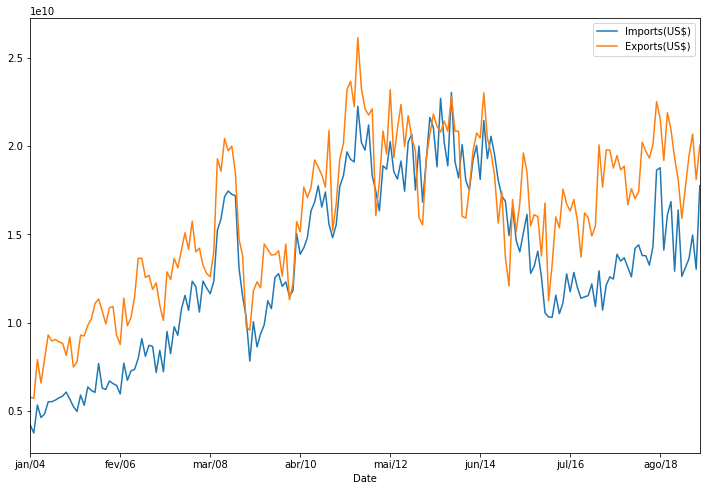

In [18]:
df.plot.line(x='Date', y=['Imports(US$)', 'Exports(US$)'])

Podemos notar como as curvas de Importação e do índice IBC-Br são bastante próximas

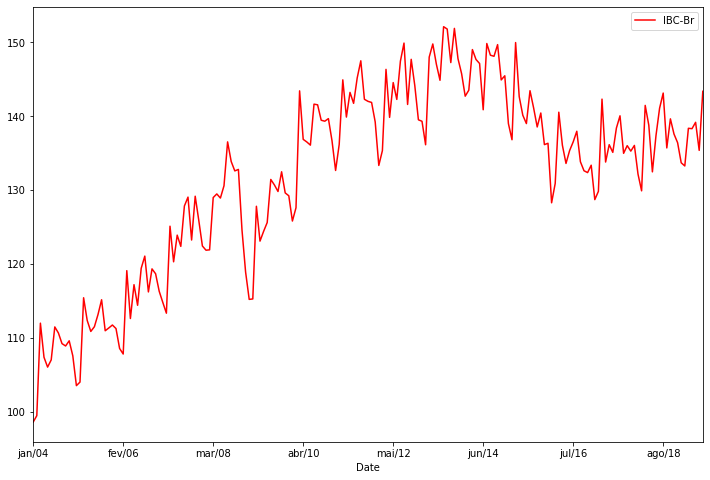

In [19]:
df.plot.line(x='Date', y=['IBC-Br'], color='red')

Análise de autocorrelação para a variável IBC-Br

Como se pode notar, a auto-correlação parcial mostra uma alta correlação para lag= 2, indicando poder preditivo

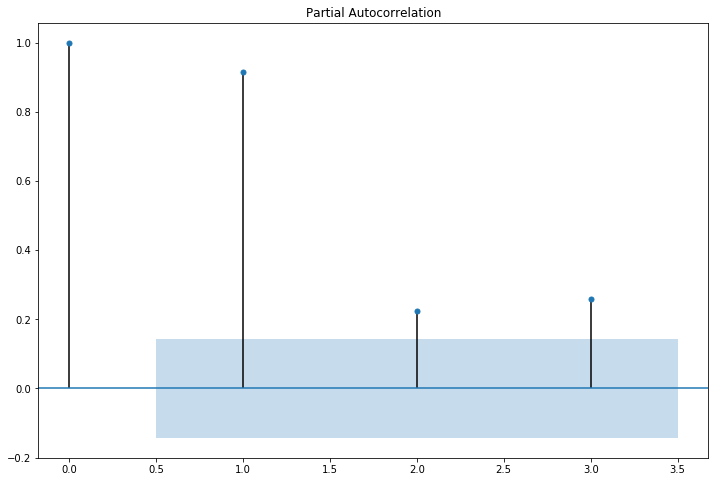

In [20]:
seriesIBC = df['IBC-Br']
plot_pacf(seriesIBC, lags=3)
pyplot.show()

Análise de autocorrelação para a variável PIB

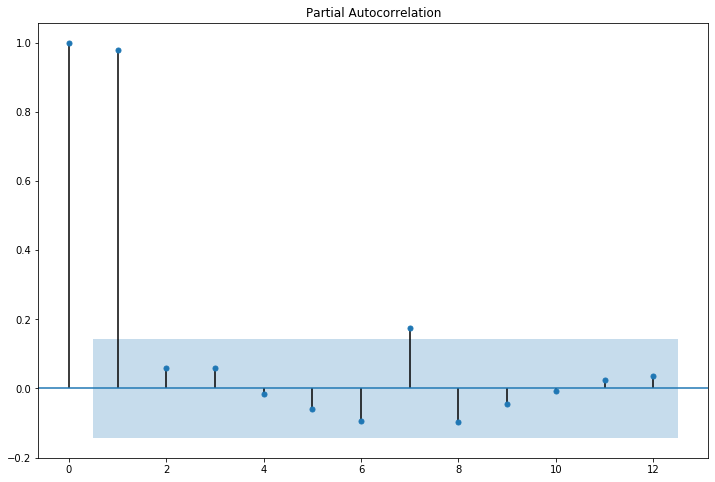

In [21]:
seriesPIB = df['PIB-mes(MU$)']
plot_pacf(seriesPIB, lags=12)
pyplot.show()

Análise de correlação cruzada entre o PIB e o IBC

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
 array([0.95319657, 0.95777309, 0.96223673, 0.96679934, 0.97123616,
        0.97620302, 0.97294899, 0.9703437 , 0.96754532, 0.96479661,
        0.96198881]),
 <matplotlib.lines.Line2D at 0x2b5ce47ba90>)

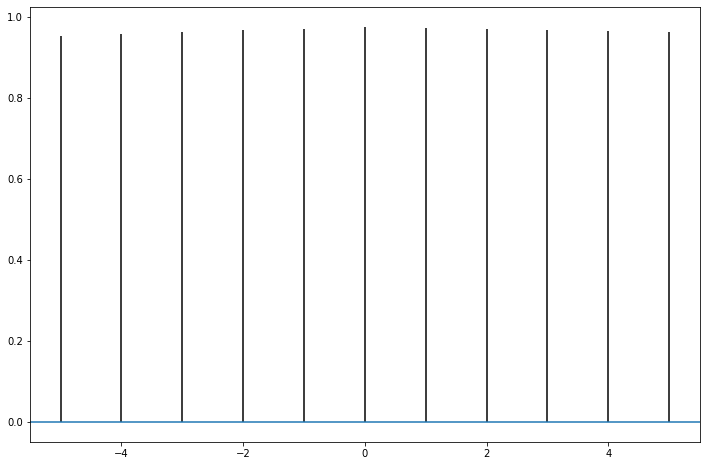

In [22]:
seriesICG= df['Exp-Iron(US$)']

pyplot.xcorr(seriesPIB, seriesIBC, maxlags=5 )

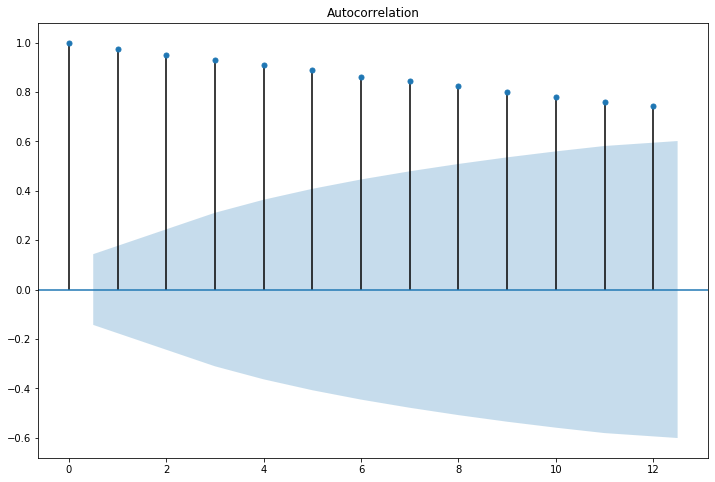

In [23]:
plot_acf(seriesPIB, lags=12)
pyplot.show()

Autocorrelação parcial para as Importações

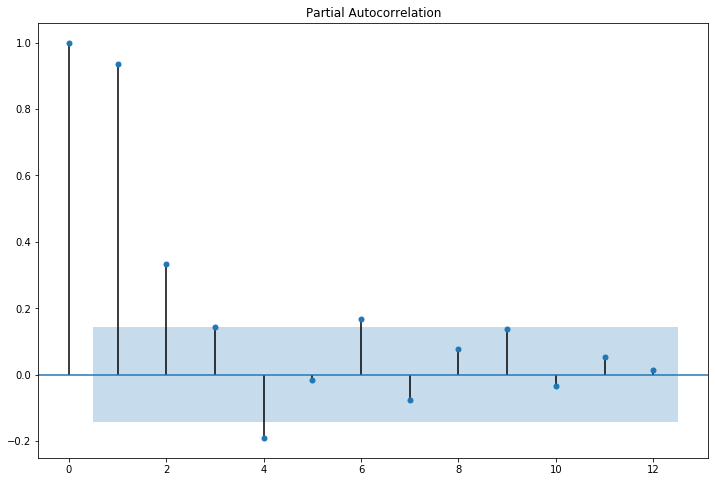

In [24]:
seriesImp = df['Imports(US$)']
plot_pacf(seriesImp, lags=12)
pyplot.show()


In [ ]:
Autocorrelação parcial para Exportações

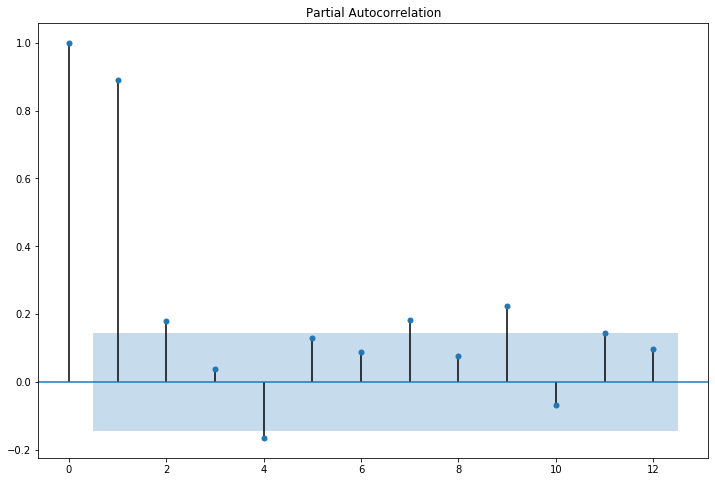

In [25]:
seriesExp= df['Exports(US$)']

plot_pacf(seriesExp, lags=12)
pyplot.show()

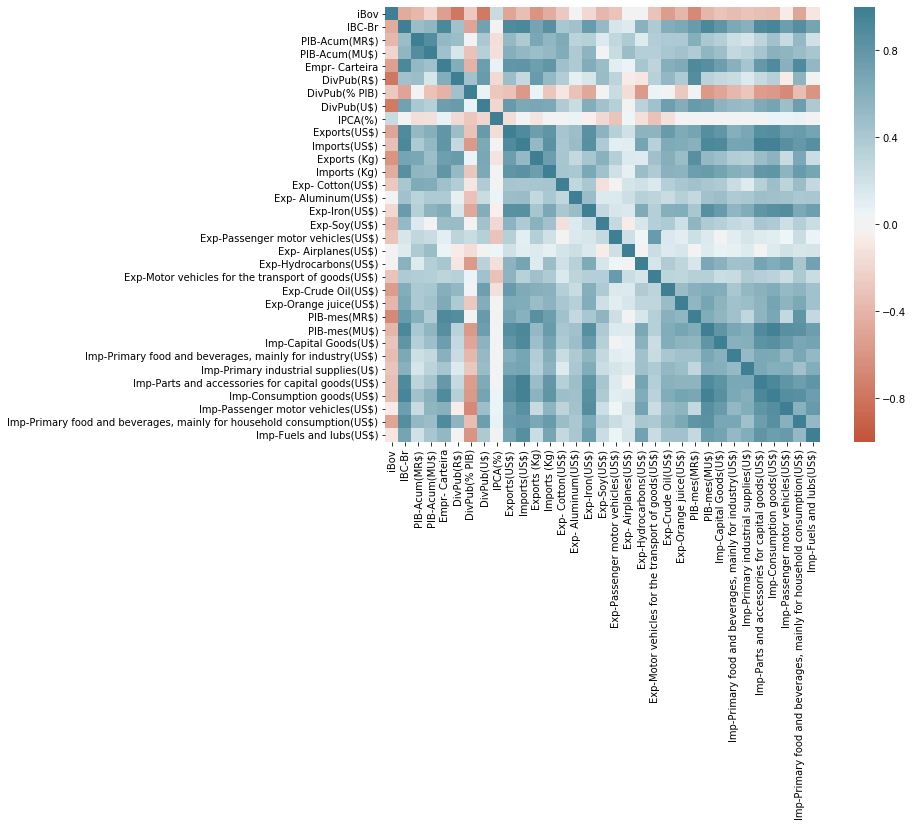

In [26]:
corr = df.corr()
fg= sns.heatmap(corr, 
       vmin=-1, vmax=1, center=0,
       cmap=sns.diverging_palette(20, 220, n=200),
       square=True)


Fazendo um shift na coluna do IBC-BR para avaliar se a correlação se mantem 



In [27]:
dfm = df
dfm['IBC-Br']= dfm['IBC-Br'].shift(-1)
dfm[:10]

,Date,iBov,IBC-Br,PIB-Acum(MR$),PIB-Acum(MU$),Empr- Carteira,DivPub(R$),DivPub(% PIB),DivPub(U$),IPCA(%),Exports(US$),Imports(US$),Exports (Kg),Imports (Kg),Exp- Cotton(US$),Exp- Aluminum(US$),Exp-Iron(US$),Exp-Soy(US$),Exp-Passenger motor vehicles(US$),Exp- Airplanes(US$),Exp-Hydrocarbons(US$),Exp-Motor vehicles for the transport of goods(US$),Exp-Crude Oil(US$),Exp-Orange juice(US$),PIB-mes(MR$),PIB-mes(MU$),Imp-Capital Goods(U$),"Imp-Primary food and beverages, mainly for industry(US$)",Imp-Primary industrial supplies(U$),Imp-Parts and accessories for capital goods(US$),Imp-Consumption goods(US$),Imp-Passenger motor vehicles(US$),"Imp-Primary food and beverages, mainly for household consumption(US$)",Imp-Fuels and lubs(US$)
0,jan/04,101812.1,99.45,144558.6,49802,107.05,917346.23,52.86,312011.91,0.76,5786904166,4207686908,32693675263,8109005076,16599701,16301956,439895545,99169681,195466018,150059109,21173604,49372462,229737858,15659284,144558.6,49802,432475957,80043004,111238900,610585790,341810085,40368251,25679527,666284765
1,fev/04,100967.2,111.98,287419.9,100147,107.81,910484.19,52.12,312558.94,0.61,5715580929,3748677231,24753835286,6759163397,12100141,9960801,282396619,127324531,188698396,176338124,18999500,64213754,200683383,6522185,142861.3,50345,466143181,84418523,128622605,562955457,347762513,54576372,35517120,459220386
2,mar/04,97030.3,107.36,444783.5,156956,108.39,913609.96,51.75,314192.85,0.47,7907130664,5336953197,36912969113,8653291327,8737312,16377398,450429529,453433518,271818533,271639106,31592860,90116404,256672821,37526414,157363.5,56809,576749464,127022414,138348791,819374520,477420075,42160962,54487435,689780576
3,abr/04,96353.3,106.03,601737.4,212280,109.36,918095.92,51.55,311863.83,0.37,6581422428,4627585238,19822876417,6992934845,3488505,9669660,211224560,568559445,232870773,209936187,35381759,79555771,76173983,21122459,156953.9,55324,551587540,68294000,164011419,732186759,384876230,37067494,27834816,760500390
4,mai/04,95414.6,107.00,761236.3,267151,110.83,941268.02,52.27,300888.03,0.51,7930944020,4830229172,25705317504,7833524404,3746205,14084690,301658994,738761974,259330813,369344186,32244076,96277826,231603147,24615219,159498.9,54872,550615137,92520056,114406903,734008556,448812347,56016852,29503907,875132053
5,jun/04,95584.4,111.47,926578.4,322731,111.91,946539.21,51.77,304676.73,0.71,9306641136,5523155106,34269174036,10132944638,10180864,17489550,394248972,1045129879,305721788,374335484,28370523,86051932,295307681,8054573,165342.2,55580,544263938,111155126,137065609,809369151,466606180,58557397,31042666,975839171
6,jul/04,97393.7,110.65,1097949.3,380813,112.98,944978.98,50.98,312286.51,0.91,8962900814,5522542967,37311383481,9274375292,32165448,19066602,489420819,681140782,330490170,333878605,44969962,107397080,231719816,19542337,171370.9,58082,558319960,92472444,136382609,815166369,484082821,56209442,31653709,962863664
7,ago/04,87887.3,109.21,1267128.2,438498,114.15,945701.39,50.36,322434.84,0.69,9051481682,5617645595,38307945336,9001272608,59615813,19659776,505739417,580532355,350573056,238813797,37853551,101290107,321934004,37300525,169178.9,57685,595847802,84396781,142169199,823085410,447089339,35141191,31911086,929027333
8,set/04,89504.0,108.89,1431830.8,495613,115.24,942224.68,49.74,329702.81,0.33,8912129563,5744523506,33817106111,9680013559,63673561,13976738,413057313,647765873,314267269,298808865,41542761,104718316,70818158,26475176,164702.5,57115,582877592,94059703,140618024,818278065,502824459,53440792,34450018,877751086
9,out/04,87423.6,109.59,1602367.3,553452,115.93,949353.89,49.71,332441.74,0.44,8835878929,5841240001,30010889468,9286933313,83163770,15328525,407411003,240405595,338704685,235363739,48760443,105642077,199131186,30335488,170536.5,57839,568220075,82148030,116104573,823481320,467807073,36711372,41011966,1194449557


In [56]:
dfm_corr= dfm.corr()
dfm_corr

,iBov,IBC-Br,PIB-Acum(MR$),PIB-Acum(MU$),Empr- Carteira,DivPub(R$),DivPub(% PIB),DivPub(U$),IPCA(%),Exports(US$),Imports(US$),Exports (Kg),Imports (Kg),Exp- Cotton(US$),Exp- Aluminum(US$),Exp-Iron(US$),Exp-Soy(US$),Exp-Passenger motor vehicles(US$),Exp- Airplanes(US$),Exp-Hydrocarbons(US$),Exp-Motor vehicles for the transport of goods(US$),Exp-Crude Oil(US$),Exp-Orange juice(US$),PIB-mes(MR$),PIB-mes(MU$),Imp-Capital Goods(U$),"Imp-Primary food and beverages, mainly for industry(US$)",Imp-Primary industrial supplies(U$),Imp-Parts and accessories for capital goods(US$),Imp-Consumption goods(US$),Imp-Passenger motor vehicles(US$),"Imp-Primary food and beverages, mainly for household consumption(US$)",Imp-Fuels and lubs(US$)
iBov,1.000000,-0.454003,-0.388184,-0.204473,-0.533442,-0.776062,-0.278083,-0.761162,0.257087,-0.491222,-0.332996,-0.608902,-0.438304,-0.278415,-0.034122,-0.184792,-0.368601,-0.297932,-0.038919,-0.029404,-0.308567,-0.543810,-0.393626,-0.678247,-0.395048,-0.306606,-0.357078,-0.304841,-0.328781,-0.352592,-0.068649,-0.487137,-0.102961
IBC-Br,-0.454003,1.000000,0.270812,0.304615,0.903214,0.440298,-0.518708,0.731689,0.060923,0.797444,0.866606,0.578349,0.756284,0.283769,0.357314,0.709109,0.497931,0.049801,-0.020621,0.575074,0.236126,0.592111,0.610860,0.726140,0.905316,0.770282,0.636617,0.524462,0.859274,0.882913,0.695114,0.784615,0.644160
PIB-Acum(MR$),-0.388184,0.270812,1.000000,0.876257,0.529357,0.482421,-0.037864,0.405292,-0.147882,0.530750,0.393624,0.665650,0.541369,0.645655,0.320090,0.345735,0.139629,0.282984,0.385624,0.127449,0.362507,0.397676,0.393336,0.600044,0.403318,0.352494,0.219906,0.173625,0.303445,0.456531,0.256451,0.516450,0.204490
PIB-Acum(MU$),-0.204473,0.304615,0.876257,1.000000,0.464367,0.158322,-0.314931,0.339787,-0.125487,0.601015,0.537488,0.476827,0.519304,0.631652,0.389342,0.567646,0.010010,0.249121,0.486114,0.358252,0.358085,0.414676,0.444430,0.368512,0.541047,0.471707,0.279203,0.318610,0.435315,0.580309,0.552842,0.490451,0.429048
Empr- Carteira,-0.533442,0.903214,0.529357,0.464367,1.000000,0.619676,-0.418428,0.741538,0.077760,0.800426,0.820190,0.731809,0.803044,0.467517,0.380605,0.637803,0.495805,0.106082,0.060086,0.426193,0.300351,0.602870,0.646205,0.902006,0.864214,0.739570,0.593663,0.433362,0.783753,0.884851,0.588814,0.896220,0.537934
DivPub(R$),-0.776062,0.440298,0.482421,0.158322,0.619676,1.000000,0.445754,0.751419,-0.156281,0.476794,0.275625,0.763395,0.508286,0.364926,0.084458,0.164690,0.500050,0.310080,-0.067278,-0.108374,0.328336,0.534246,0.383329,0.880835,0.320438,0.273821,0.247313,0.133230,0.265598,0.340393,-0.057827,0.566657,-0.032163
DivPub(% PIB),-0.278083,-0.518708,-0.037864,-0.314931,-0.418428,0.445754,1.000000,0.069601,-0.282674,-0.317513,-0.570832,0.052417,-0.291547,-0.090154,-0.317576,-0.473287,0.014940,0.244096,-0.155825,-0.560530,0.051525,-0.022844,-0.269034,-0.015546,-0.575073,-0.491234,-0.374116,-0.296267,-0.539589,-0.574136,-0.675866,-0.349425,-0.602804
DivPub(U$),-0.761162,0.731689,0.405292,0.339787,0.741538,0.751419,0.069601,1.000000,-0.192314,0.770114,0.655050,0.666159,0.654954,0.370604,0.247059,0.611994,0.446256,0.349849,0.012103,0.320735,0.451691,0.731931,0.609496,0.770078,0.738778,0.574797,0.508648,0.504980,0.642203,0.694011,0.470864,0.746109,0.391623
IPCA(%),0.257087,0.060923,-0.147882,-0.125487,0.077760,-0.156281,-0.282674,-0.192314,1.000000,-0.153057,0.010862,-0.112376,-0.032876,0.020074,0.050796,-0.046628,-0.181431,-0.304769,0.043754,-0.133767,-0.315118,-0.127858,0.009597,-0.013140,0.003036,-0.000659,-0.008584,-0.004493,-0.014018,0.058292,0.057330,0.075310,0.029026
Exports(US$),-0.491222,0.797444,0.530750,0.601015,0.800426,0.476794,-0.317513,0.770114,-0.153057,1.000000,0.896700,0.737001,0.815202,0.429974,0.477247,0.838523,0.574154,0.343583,0.209063,0.575543,0.556643,0.767916,0.642593,0.688320,0.869090,0.799851,0.607383,0.674050,0.860099,0.878908,0.745328,0.761116,0.694765


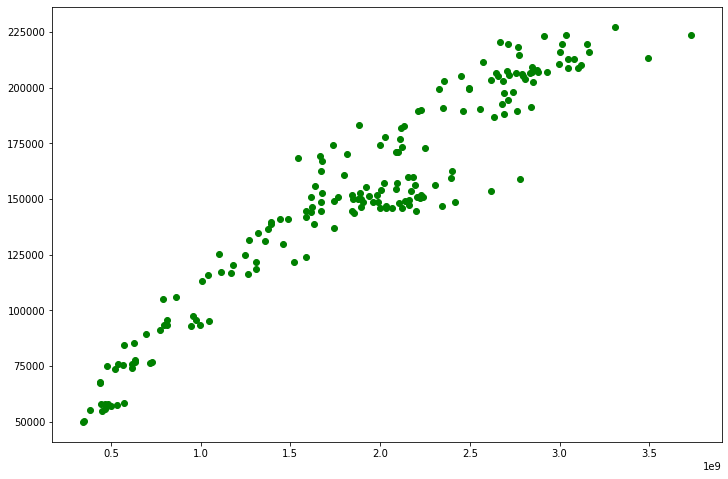

In [34]:
pyplot.scatter(df[' Imp-Consumption goods(US$)'], df['PIB-mes(MU$)'], color='green')

Fazendo a análise re regressão linear

In [56]:
X = df[[' Imp-Consumption goods(US$)','Imp-Parts and accessories for capital goods(US$)']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['PIB-mes(MU$)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


prediction = regr.predict(X)




Intercept: 
 41335.22958077301
Coefficients: 
 [5.17282851e-05 8.26687372e-06]


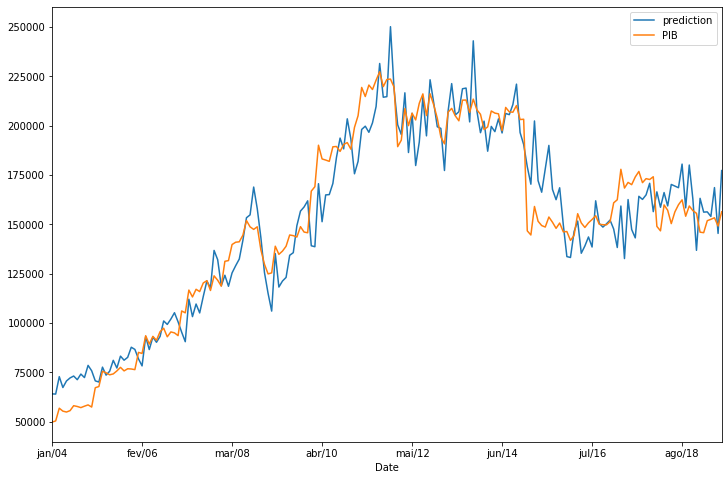

In [80]:
seriesDate= df['Date']


predDf= pd.DataFrame(columns=['Date','prediction', 'PIB'] )

predDf['Date']= seriesDate
predDf['prediction'] = prediction
predDf['PIB']= df['PIB-mes(MU$)']
#predDf

predDf.plot.line( x= 'Date', y = ['prediction', 'PIB'])




In [81]:
predDf.corr()

,prediction,PIB
prediction,1.000000,0.956936
PIB,0.956936,1.000000


In [83]:
predDf


,Date,prediction,PIB
0,jan/04,64064.114730,49802
1,fev/04,63978.269674,50345
2,mar/04,72805.017020,56809
3,abr/04,67297.112411,55324
4,mai/04,70619.478666,54872
5,jun/04,72162.919654,55580
6,jul/04,73114.881192,58082
7,ago/04,71266.737520,57685
8,set/04,74110.077984,57115
9,out/04,72341.703309,57839
